In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from scipy.stats import pearsonr
from sklearn import ensemble
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', 30)

In [6]:
data_august = pd.read_csv("apartments_pl_2023_08.csv", true_values=['yes'], false_values=['no'])
data_september = pd.read_csv("apartments_pl_2023_09.csv", true_values=['yes'], false_values=['no'])
data_october = pd.read_csv("apartments_pl_2023_10.csv", true_values=['yes'], false_values=['no'])
data_november = pd.read_csv("apartments_pl_2023_11.csv", true_values=['yes'], false_values=['no'])

In [7]:
data_august['month'] = 8
data_september['month'] = 9
data_october['month'] = 10
data_november['month'] = 11

In [8]:
data_august.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,9.0,0.118,1.389,0.628,0.105,1.652,NaN,0.413,condominium,concreteSlab,NaN,True,True,True,False,True,415000,8
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,0.291,0.348,1.404,0.205,cooperative,concreteSlab,NaN,False,True,True,False,True,395995,8
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,False,False,False,False,False,565000,8
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,0.359,0.101,0.310,0.087,condominium,brick,NaN,True,True,False,False,True,640000,8
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,0.704,0.501,2.138,0.514,condominium,NaN,NaN,False,False,False,False,False,759000,8


In [9]:
data = pd.concat([data_august, data_september, data_october, data_november], ignore_index = True)

In [10]:
data.dtypes

id                       object
city                     object
type                     object
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                object
buildingMaterial         object
condition                object
hasParkingSpace            bool
hasBalcony                 bool
hasElevator              object
hasSecurity                bool
hasStorageRoom             bool
price                     int64
month                     int64
dtype: object

In [11]:
data.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,9.0,0.118,1.389,0.628,0.105,1.652,NaN,0.413,condominium,concreteSlab,NaN,True,True,True,False,True,415000,8
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,0.291,0.348,1.404,0.205,cooperative,concreteSlab,NaN,False,True,True,False,True,395995,8
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,False,False,False,False,False,565000,8
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,0.359,0.101,0.310,0.087,condominium,brick,NaN,True,True,False,False,True,640000,8
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,0.704,0.501,2.138,0.514,condominium,NaN,NaN,False,False,False,False,False,759000,8


In [12]:
data.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price,month
count,68894.000000,68894.000000,56422.000000,67938.000000,56959.000000,68894.000000,68894.000000,68894.000000,68894.000000,68825.000000,68575.000000,68799.000000,68826.000000,68701.000000,66873.000000,68787.000000,6.889400e+04,68894.000000
mean,58.944435,2.685212,3.305431,5.221172,1984.586527,52.045462,19.501237,4.342607,20.337460,0.416781,0.983966,0.523196,0.376271,0.357266,1.449895,0.366447,7.151848e+05,9.441098
std,21.279593,0.911641,2.506487,3.270862,34.058699,1.339131,1.781489,2.873857,23.816947,0.479851,0.905907,0.513988,0.463293,0.484109,1.106158,0.478425,3.515693e+05,1.126327
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.978999,14.447127,0.020000,0.000000,0.004000,0.001000,0.001000,0.002000,0.001000,0.006000,0.001000,1.500000e+05,8.000000
25%,44.492500,2.000000,2.000000,3.000000,1965.000000,51.114026,18.523780,1.990000,7.000000,0.175000,0.359000,0.239000,0.158000,0.117000,0.584000,0.145000,4.700000e+05,8.000000
50%,55.000000,3.000000,3.000000,4.000000,1991.000000,52.195312,19.899315,3.940000,13.000000,0.290000,0.681000,0.392000,0.266000,0.234000,1.121000,0.241000,6.490000e+05,9.000000
75%,69.000000,3.000000,4.000000,6.000000,2014.000000,52.440563,20.994734,6.120000,24.000000,0.468000,1.255000,0.628000,0.421000,0.416000,2.070000,0.407000,8.600000e+05,10.000000
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.606460,23.207128,16.940000,208.000000,4.818000,4.998000,4.968000,4.960000,4.985000,5.000000,4.992000,2.500000e+06,11.000000


In [13]:
data.describe(include='object')

,id,city,type,ownership,buildingMaterial,condition,hasElevator
count,68894,68894,53616,68894,42103,16970,65349
unique,39028,15,3,3,2,2,2
top,98bd9e22e76cf1b940267b08127c69be,warszawa,blockOfFlats,condominium,brick,premium,False
freq,4,20256,32104,61814,32519,9351,34587


In [14]:
data.count()

id                      68894
city                    68894
type                    53616
squareMeters            68894
rooms                   68894
floor                   56422
floorCount              67938
buildYear               56959
latitude                68894
longitude               68894
centreDistance          68894
poiCount                68894
schoolDistance          68825
clinicDistance          68575
postOfficeDistance      68799
kindergartenDistance    68826
restaurantDistance      68701
collegeDistance         66873
pharmacyDistance        68787
ownership               68894
buildingMaterial        42103
condition               16970
hasParkingSpace         68894
hasBalcony              68894
hasElevator             65349
hasSecurity             68894
hasStorageRoom          68894
price                   68894
month                   68894
dtype: int64

In [15]:
data = data.drop(['id'], axis=1)

In [16]:
cities = data['city'].unique()
print('Cities: ', cities)

Cities:  ['szczecin' 'gdynia' 'krakow' 'poznan' 'bialystok' 'gdansk' 'wroclaw'
 'radom' 'rzeszow' 'lodz' 'katowice' 'lublin' 'czestochowa' 'warszawa'
 'bydgoszcz']


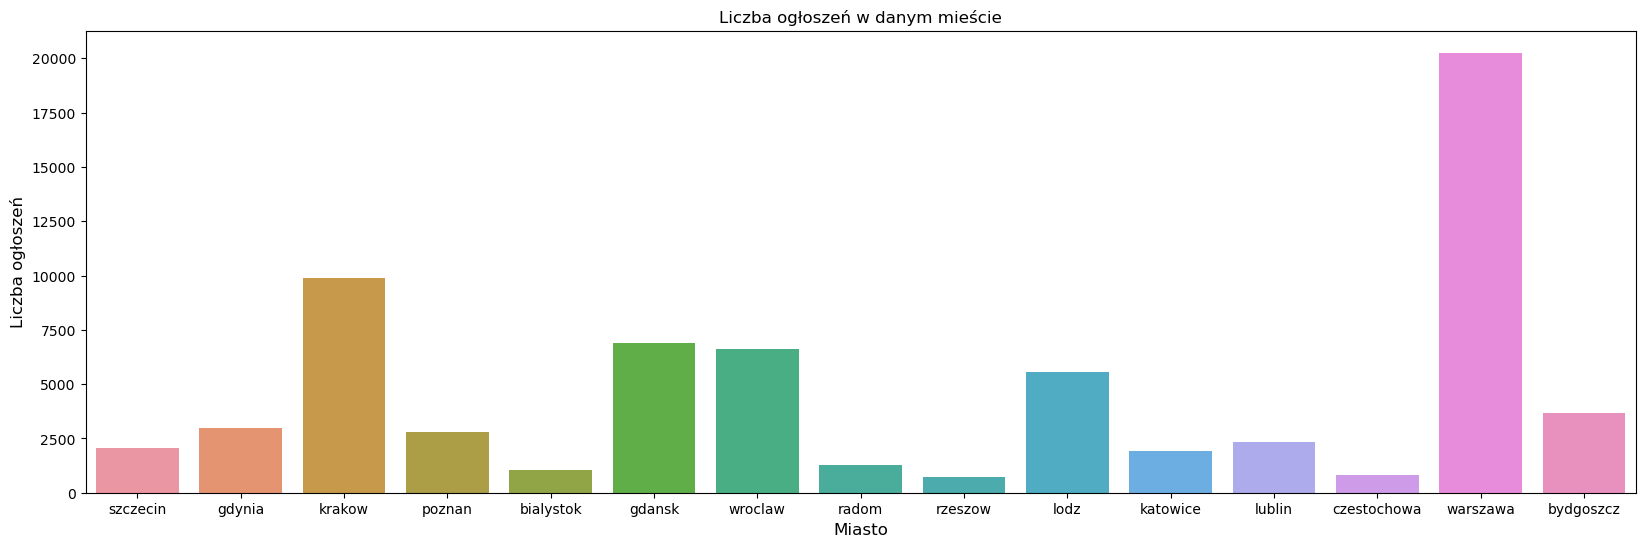

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'city', data = data).set_title("Liczba ogłoszeń w danym mieście")
plt.xlabel("Miasto", fontsize=12)
plt.ylabel("Liczba ogłoszeń", fontsize=12)
plt.show()

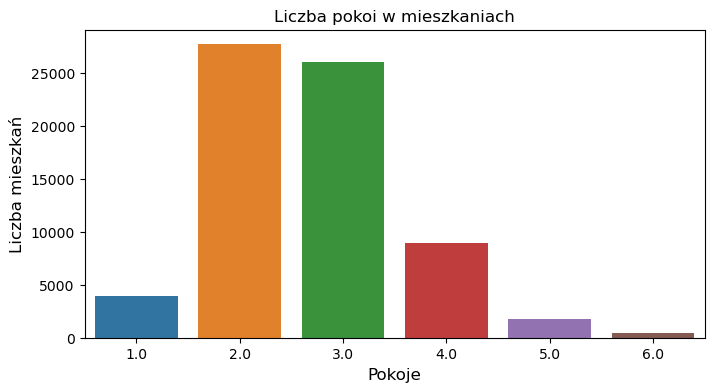

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'rooms', data = data).set_title("Liczba pokoi w mieszkaniach")
plt.xlabel('Pokoje', fontsize=12)
plt.ylabel('Liczba mieszkań', fontsize=12)
plt.show()

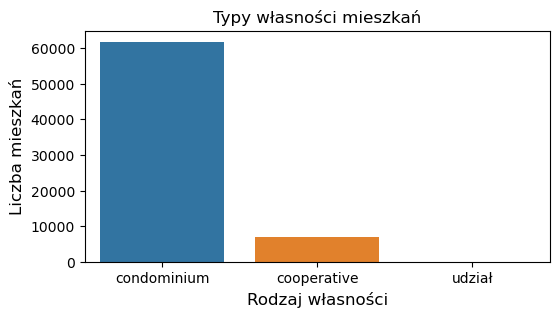

ownership
condominium    61814
cooperative     7077
udział             3
Name: count, dtype: int64

In [20]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'ownership', data = data).set_title("Typy własności mieszkań")
plt.xlabel('Rodzaj własności', fontsize=12)
plt.ylabel('Liczba mieszkań', fontsize=12)
plt.show()
data['ownership'].value_counts()

In [182]:
data = data.drop(data[data['ownership'] == 'udział'].index)

In [185]:
data['type'].value_counts()

type
blockOfFlats         32103
tenement             10834
apartmentBuilding    10676
Name: count, dtype: int64

In [186]:
data['condition'].value_counts()

condition
premium    9351
low        7616
Name: count, dtype: int64

In [198]:
data['condition'] = data['condition'].fillna('unsigned')

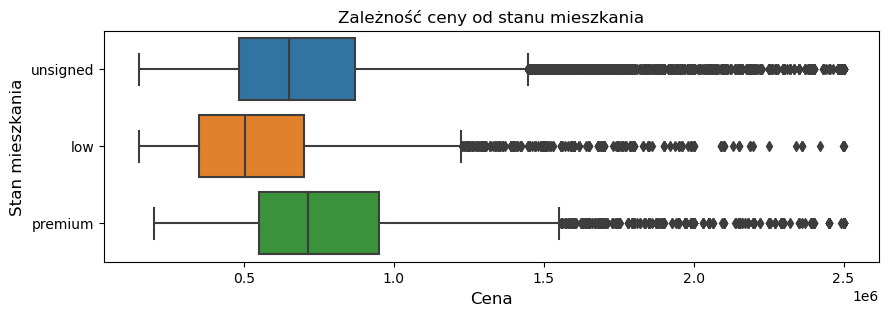

In [200]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='price', y='condition', data=data)
plt.title('Zależność ceny od stanu mieszkania')
plt.xlabel('Cena', fontsize=12)
plt.ylabel('Stan mieszkania', fontsize=12)
plt.show()

<Figure size 1000x1000 with 0 Axes>

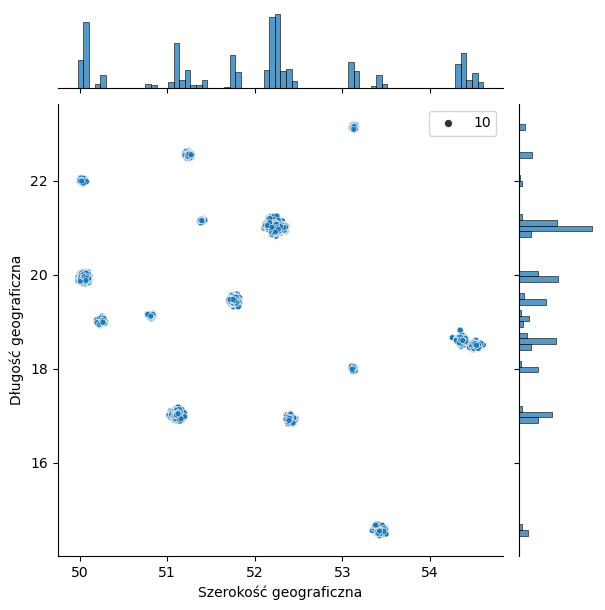

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [13]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=10)
plt.ylabel('Długość geograficzna')
plt.xlabel('Szerokość geograficzna')
plt.show()
sns.despine

In [14]:
warsaw_data = data[data['city'] == 'warszawa']

<Figure size 1000x1000 with 0 Axes>

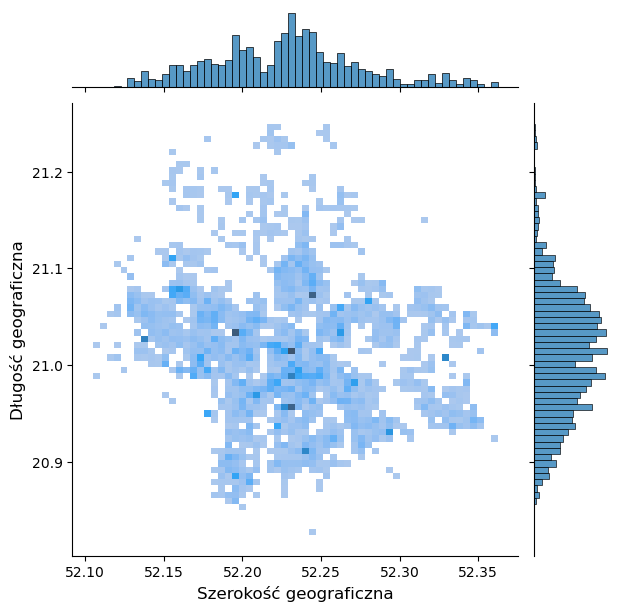

In [212]:
plt.figure(figsize=(10, 10))
sns.jointplot(x=warsaw_data.latitude.values, y=warsaw_data.longitude.values, kind = 'hist')
plt.ylabel('Długość geograficzna', fontsize=12)
plt.xlabel('Szerokość geograficzna', fontsize=12)
plt.show()

Wykres dla miasta  szczecin


<Figure size 600x600 with 0 Axes>

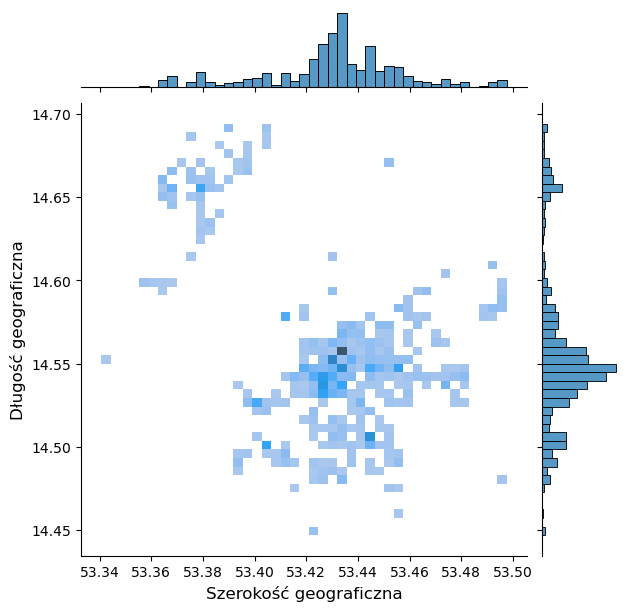

Wykres dla miasta  gdynia


<Figure size 600x600 with 0 Axes>

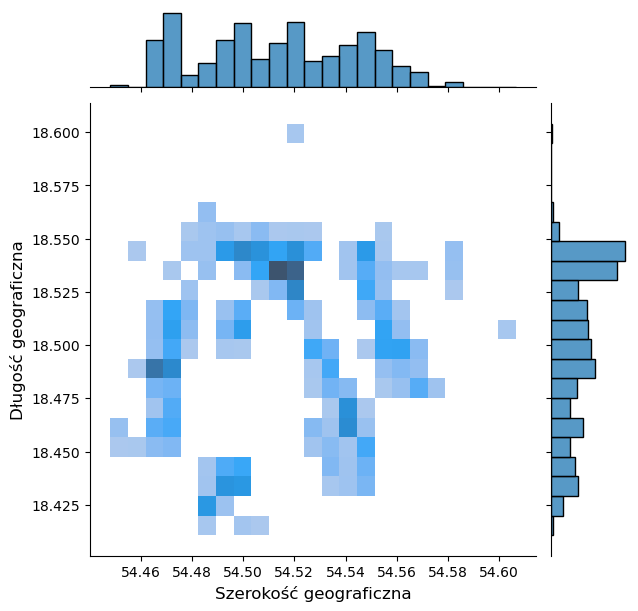

Wykres dla miasta  krakow


<Figure size 600x600 with 0 Axes>

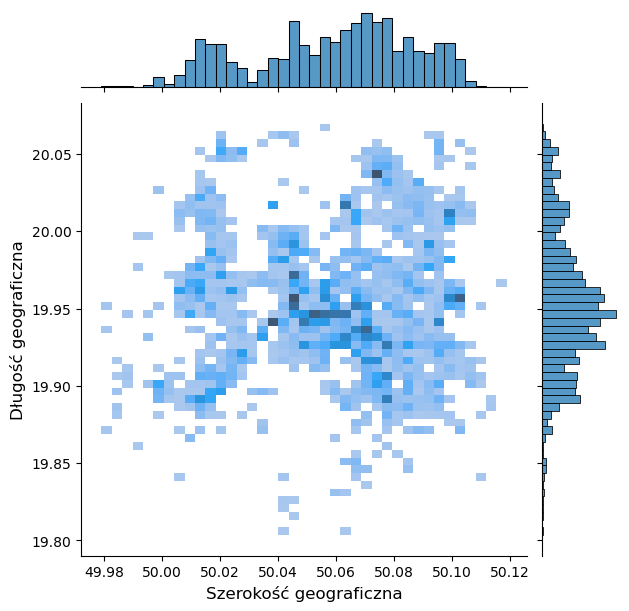

Wykres dla miasta  poznan


<Figure size 600x600 with 0 Axes>

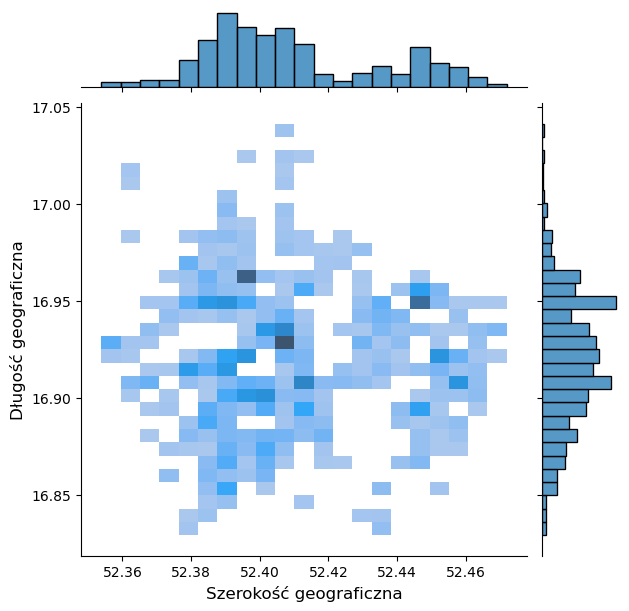

Wykres dla miasta  bialystok


<Figure size 600x600 with 0 Axes>

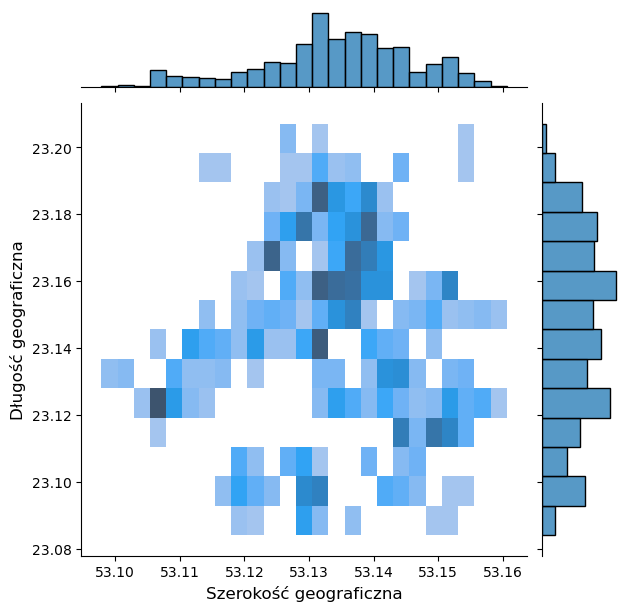

Wykres dla miasta  gdansk


<Figure size 600x600 with 0 Axes>

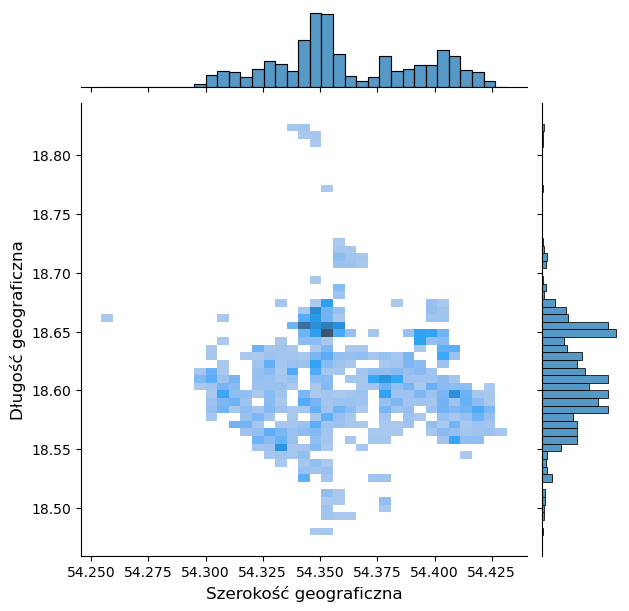

Wykres dla miasta  wroclaw


<Figure size 600x600 with 0 Axes>

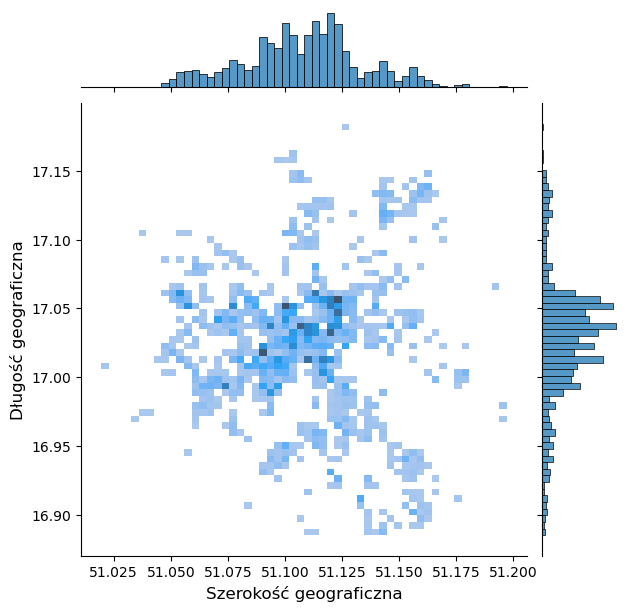

Wykres dla miasta  radom


<Figure size 600x600 with 0 Axes>

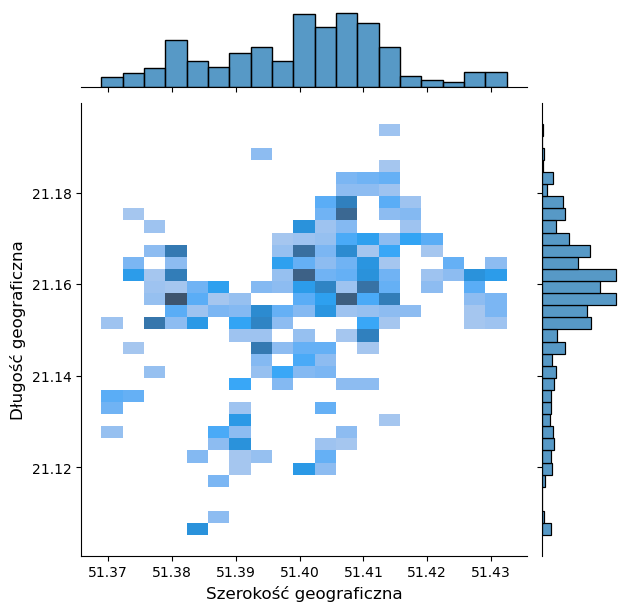

Wykres dla miasta  rzeszow


<Figure size 600x600 with 0 Axes>

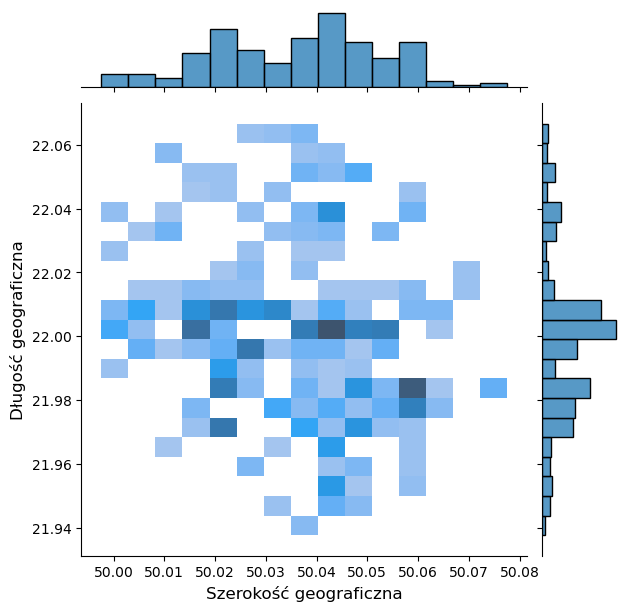

Wykres dla miasta  lodz


<Figure size 600x600 with 0 Axes>

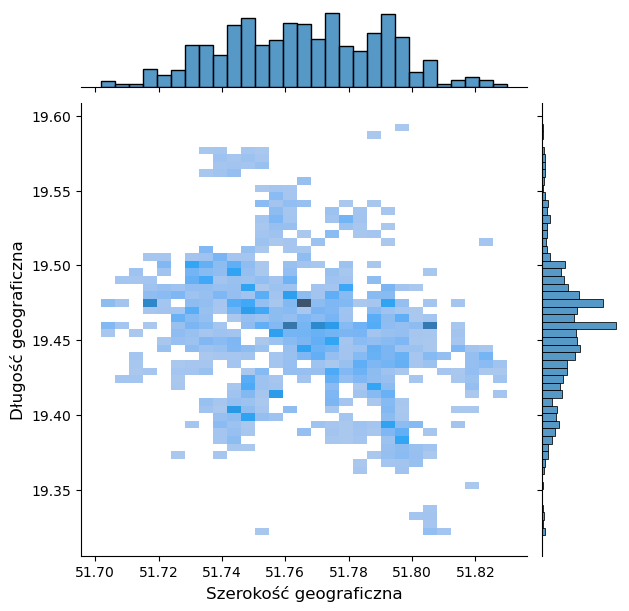

Wykres dla miasta  katowice


<Figure size 600x600 with 0 Axes>

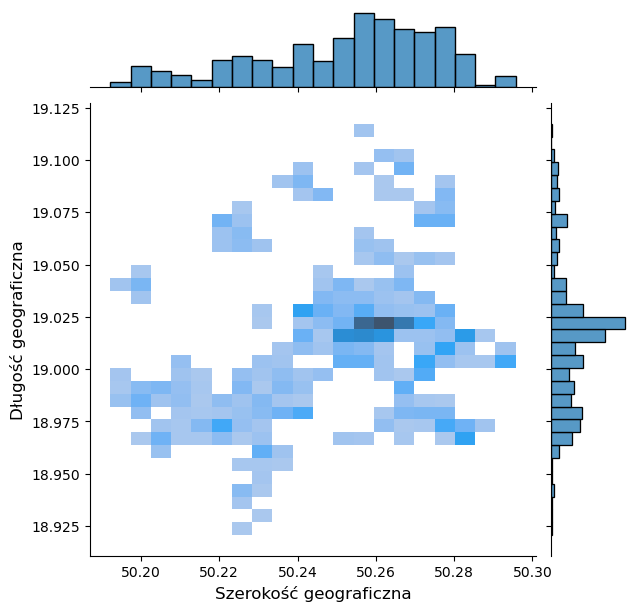

Wykres dla miasta  lublin


<Figure size 600x600 with 0 Axes>

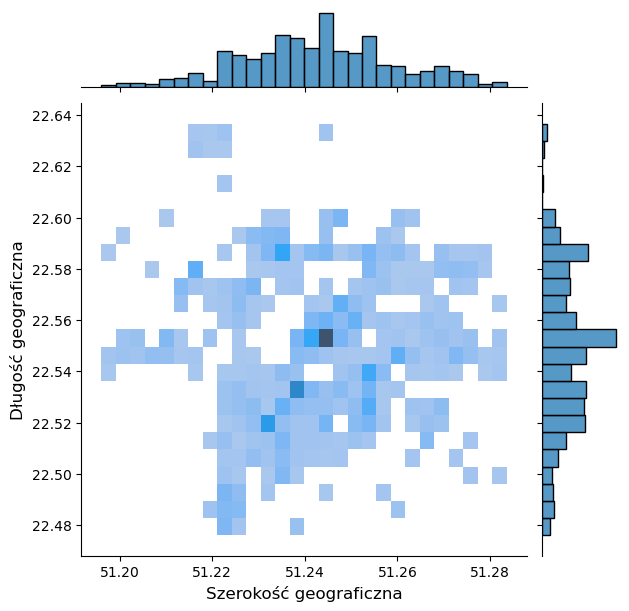

Wykres dla miasta  czestochowa


<Figure size 600x600 with 0 Axes>

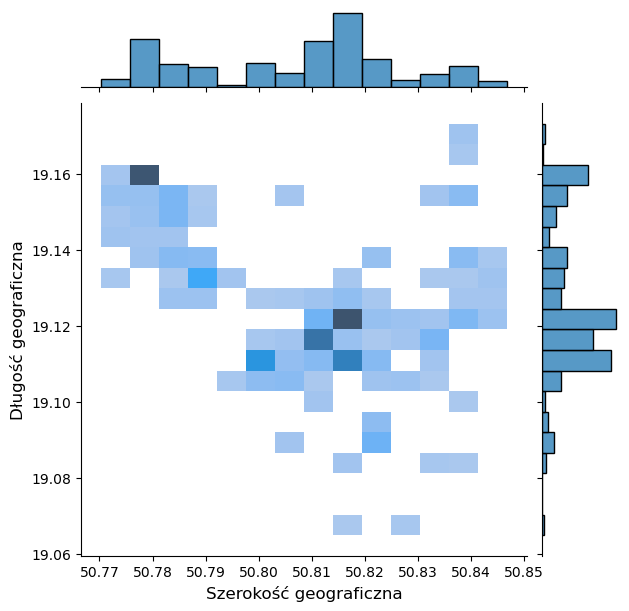

Wykres dla miasta  warszawa


<Figure size 600x600 with 0 Axes>

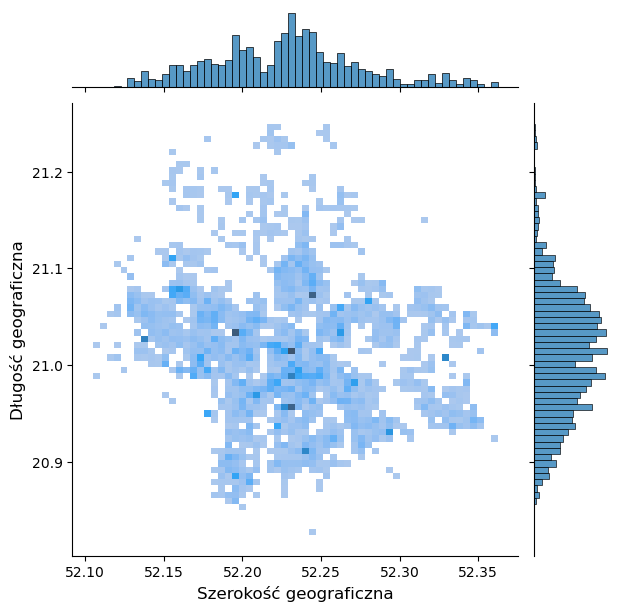

Wykres dla miasta  bydgoszcz


<Figure size 600x600 with 0 Axes>

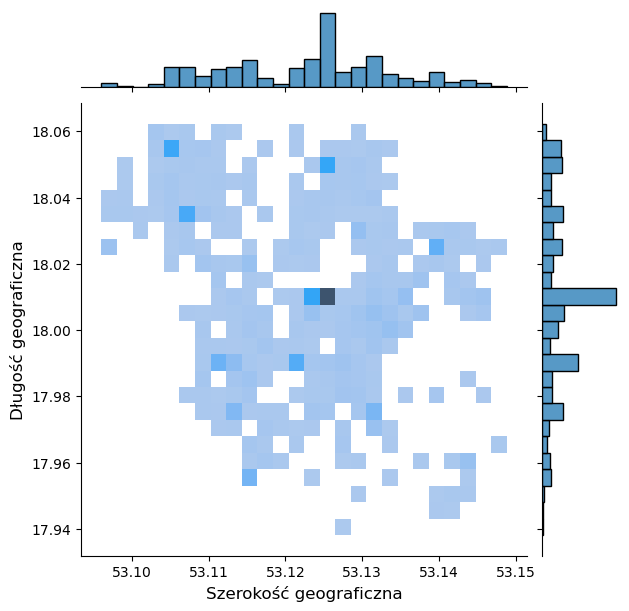

In [231]:
cities = ['szczecin', 'gdynia', 'krakow', 'poznan', 'bialystok', 'gdansk', 'wroclaw',
 'radom', 'rzeszow', 'lodz', 'katowice', 'lublin', 'czestochowa', 'warszawa',
 'bydgoszcz']

for city in cities:
    print('Wykres dla miasta ', city)
    city_data = data[data['city'] == city]
    plt.figure(figsize=(6,6))
    sns.jointplot(x=city_data.latitude.values, y=city_data.longitude.values, kind = 'hist')
    plt.ylabel('Długość geograficzna', fontsize=12)
    plt.xlabel('Szerokość geograficzna', fontsize=12)
    plt.show()

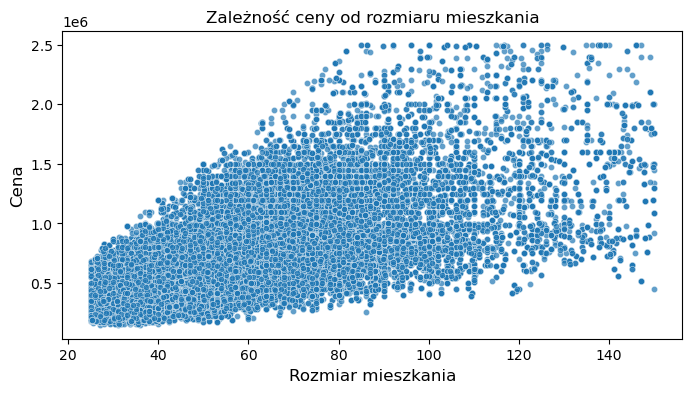

In [227]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='squareMeters', y='price', data=data, s=20, alpha=0.7)
plt.title('Zależność ceny od rozmiaru mieszkania')
plt.xlabel('Rozmiar mieszkania', fontsize=12)
plt.ylabel('Cena', fontsize=12)
plt.show()

In [367]:
correlation_coefficient, p_value = pearsonr(data['squareMeters'], data['price'])
print(f"Współczynnik korelacji Pearsona: {correlation_coefficient}")
print(f"P-wartość: {p_value}")

Współczynnik korelacji Pearsona: 0.6225598142744349
P-wartość: 0.0


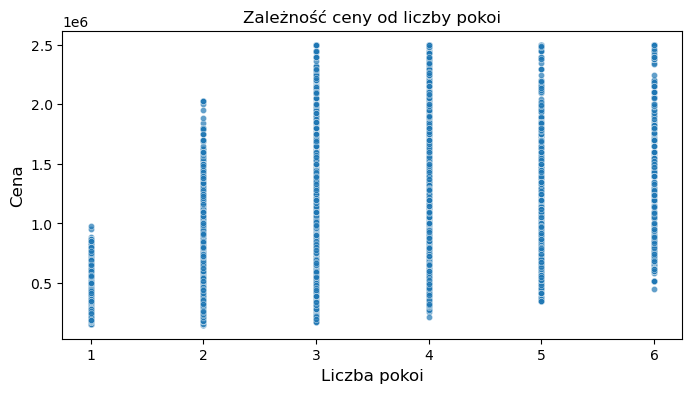

In [228]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='rooms', y='price', data=data, s=20, alpha=0.7)
plt.title('Zależność ceny od liczby pokoi')
plt.xlabel('Liczba pokoi', fontsize=12)
plt.ylabel('Cena', fontsize=12)
plt.show()

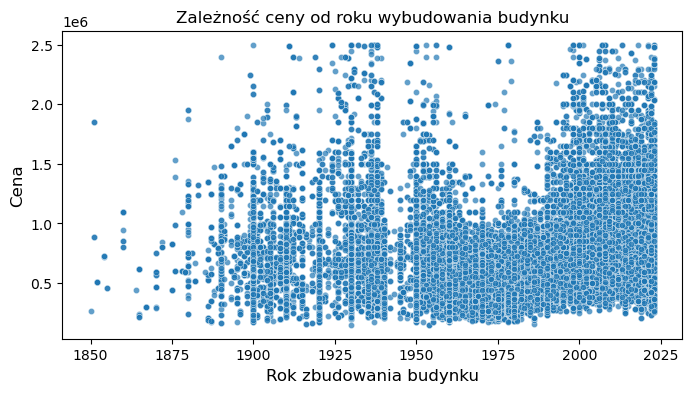

In [229]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='buildYear', y='price', data=data, s=20, alpha=0.7)
plt.title('Zależność ceny od roku wybudowania budynku')
plt.xlabel('Rok zbudowania budynku', fontsize=12)
plt.ylabel('Cena', fontsize=12)
plt.show()

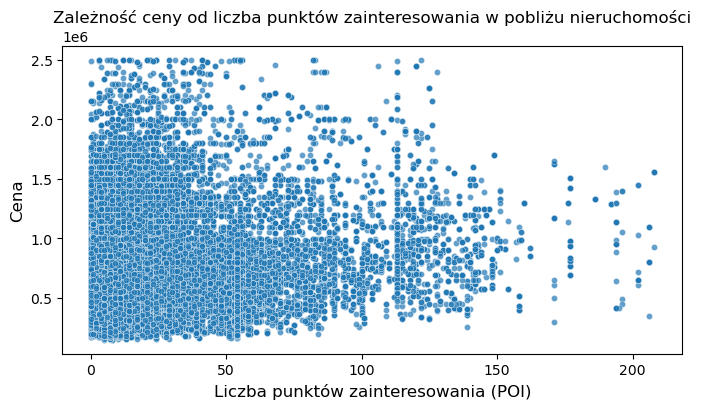

In [238]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='poiCount', y='price', data=data, s=20, alpha=0.7)
plt.title('Zależność ceny od liczba punktów zainteresowania w pobliżu nieruchomości')
plt.xlabel('Liczba punktów zainteresowania (POI)', fontsize=12)
plt.ylabel('Cena', fontsize=12)
plt.show()

In [13]:
#conv_dates = [1 if values == 2014 else 0 for values in data.buildYear ]
#data['buildYear'] = conv_dates

In [257]:
data_delete_nan = data

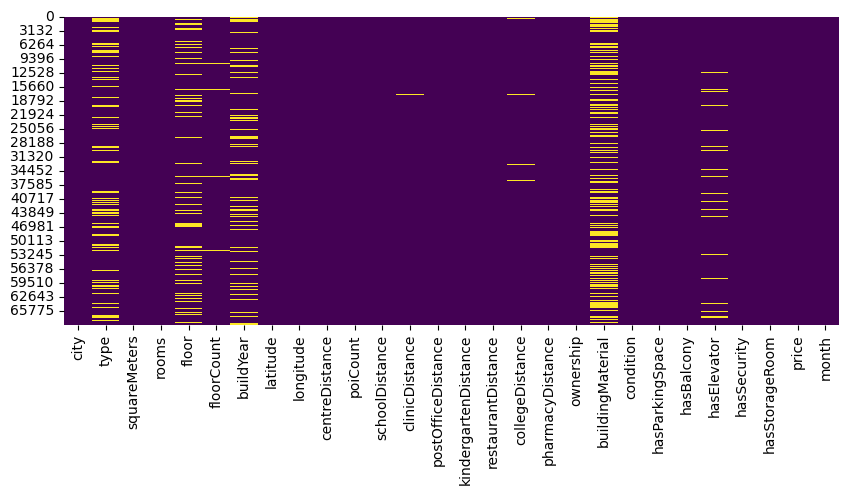

In [258]:
plt.figure(figsize=(10, 4))
sns.heatmap(data_delete_nan.isna(), cmap='viridis', cbar=False)
plt.show()

In [259]:
nan_counts = data_delete_nan.isna().sum()
print(nan_counts)

city                        0
type                    15278
squareMeters                0
rooms                       0
floor                   12472
floorCount                956
buildYear               11935
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             69
clinicDistance            319
postOfficeDistance         95
kindergartenDistance       68
restaurantDistance        193
collegeDistance          2021
pharmacyDistance          107
ownership                   0
buildingMaterial        26791
condition                   0
hasParkingSpace             0
hasBalcony                  0
hasElevator              3545
hasSecurity                 0
hasStorageRoom              0
price                       0
month                       0
dtype: int64


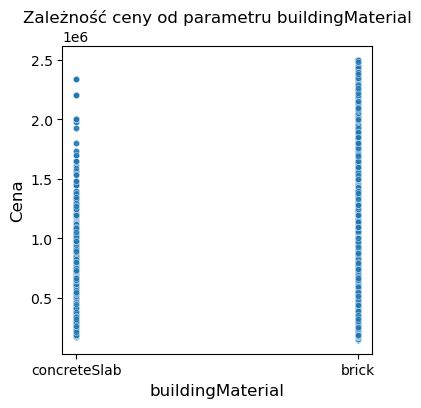

In [260]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x='buildingMaterial', y='price', data=data_delete_nan, s=20, alpha=0.7)
plt.title('Zależność ceny od parametru buildingMaterial')
plt.xlabel('buildingMaterial', fontsize=12)
plt.ylabel('Cena', fontsize=12)
plt.show()

In [261]:
data_delete_nan = data_delete_nan.drop('buildingMaterial', axis=1)

In [262]:
count_nan_records = data_delete_nan.isna().any(axis=1).sum()
print(count_nan_records)

33372


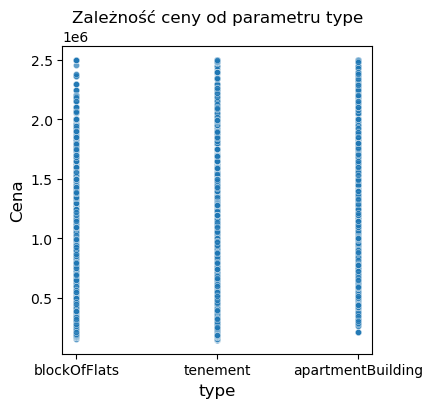

In [263]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x='type', y='price', data=data_delete_nan, s=20, alpha=0.7)
plt.title('Zależność ceny od parametru type')
plt.xlabel('type', fontsize=12)
plt.ylabel('Cena', fontsize=12)
plt.show()

In [264]:
data_delete_nan = data_delete_nan.drop('type', axis=1)

In [265]:
count_nan_records = data_delete_nan.isna().any(axis=1).sum()
print(count_nan_records)

25096


In [266]:
data_delete_nan = data_delete_nan.dropna()

In [267]:
nan_counts = data_delete_nan.isna().sum()
print(nan_counts) #nie powinno być żadnych wartości NaN

city                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
ownership               0
condition               0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
month                   0
dtype: int64


In [268]:
data_replace_nan = data

In [269]:
columns_to_fill = ['type', 'buildingMaterial']
data_replace_nan[columns_to_fill] = data_replace_nan[columns_to_fill].fillna('unsigned')

In [271]:
nan_counts = data_replace_nan.isna().sum()
print(nan_counts)

city                        0
type                        0
squareMeters                0
rooms                       0
floor                   12472
floorCount                956
buildYear               11935
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             69
clinicDistance            319
postOfficeDistance         95
kindergartenDistance       68
restaurantDistance        193
collegeDistance          2021
pharmacyDistance          107
ownership                   0
buildingMaterial            0
condition                   0
hasParkingSpace             0
hasBalcony                  0
hasElevator              3545
hasSecurity                 0
hasStorageRoom              0
price                       0
month                       0
dtype: int64


In [272]:
columns_to_fill = ['schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
                   'restaurantDistance', 'collegeDistance', 'pharmacyDistance']
data_replace_nan[columns_to_fill] = data_replace_nan[columns_to_fill].fillna(7.0)

In [273]:
nan_counts = data_replace_nan.isna().sum()
print(nan_counts)

city                        0
type                        0
squareMeters                0
rooms                       0
floor                   12472
floorCount                956
buildYear               11935
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance              0
clinicDistance              0
postOfficeDistance          0
kindergartenDistance        0
restaurantDistance          0
collegeDistance             0
pharmacyDistance            0
ownership                   0
buildingMaterial            0
condition                   0
hasParkingSpace             0
hasBalcony                  0
hasElevator              3545
hasSecurity                 0
hasStorageRoom              0
price                       0
month                       0
dtype: int64


In [274]:
print(data_replace_nan.dtypes)

city                     object
type                     object
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                object
buildingMaterial         object
condition                object
hasParkingSpace            bool
hasBalcony                 bool
hasElevator              object
hasSecurity                bool
hasStorageRoom             bool
price                     int64
month                     int64
dtype: object


In [286]:
data_replace_nan['hasElevator'].unique()

array([True, False, nan], dtype=object)

In [287]:
data_replace_nan[['hasElevator']] = data_replace_nan[['hasElevator']].fillna(2)

In [289]:
columns = data_replace_nan[['floor', 'floorCount', 'buildYear']]
mean_values_by_city = columns.groupby(data_replace_nan['city']).mean()
print(mean_values_by_city)

                floor  floorCount    buildYear
city                                          
bialystok    3.431700    5.196041  1987.273438
bydgoszcz    2.784920    4.049033  1973.272074
czestochowa  2.900576    4.606618  1975.584362
gdansk       3.099744    4.965366  1986.548628
gdynia       2.817483    4.451256  1987.586376
katowice     3.633991    5.876557  1973.316434
krakow       3.050501    4.796379  1989.247046
lodz         3.226527    5.023749  1974.880478
lublin       3.088573    4.481755  1983.919064
poznan       3.373262    5.272154  1981.731443
radom        3.514178    5.155294  1974.464837
rzeszow      3.792359    5.949650  2000.041667
szczecin     3.143605    4.453922  1966.097263
warszawa     3.724031    6.105095  1988.858480
wroclaw      3.062637    4.871830  1981.141323


In [290]:
def fillna_by_city(row):
    city = row['city']
    for col in ['floor', 'floorCount', 'buildYear']:
        if pd.isna(row[col]):
            row[col] = mean_values_by_city.loc[city, col]
    return row

In [294]:
data_replace_nan = data_replace_nan.apply(fillna_by_city, axis=1)

In [295]:
nan_counts = data_replace_nan.isna().sum()
print(nan_counts) #zbiór na tym etapie nie powinien mieć żadnych wartości NaN

city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
ownership               0
buildingMaterial        0
condition               0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
month                   0
dtype: int64


In [296]:
print(data_replace_nan.dtypes)

city                     object
type                     object
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                object
buildingMaterial         object
condition                object
hasParkingSpace            bool
hasBalcony                 bool
hasElevator              object
hasSecurity                bool
hasStorageRoom             bool
price                     int64
month                     int64
dtype: object


In [297]:
print(data_delete_nan.dtypes)

city                     object
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                object
condition                object
hasParkingSpace            bool
hasBalcony                 bool
hasElevator              object
hasSecurity                bool
hasStorageRoom             bool
price                     int64
month                     int64
dtype: object


In [17]:
enc = LabelEncoder()

In [301]:
data_deleted_labeled = data_delete_nan
data_replaced_labeled = data_replace_nan

In [302]:
data_deleted_labeled['city'] = enc.fit_transform(data_deleted_labeled['city'])
data_deleted_labeled['ownership'] = enc.fit_transform(data_deleted_labeled['ownership'])
data_deleted_labeled['condition'] = enc.fit_transform(data_deleted_labeled['condition'])
data_deleted_labeled['hasElevator'] = enc.fit_transform(data_deleted_labeled['hasElevator'])

In [303]:
data_replaced_labeled['city'] = enc.fit_transform(data_replaced_labeled['city'])
data_replaced_labeled['type'] = enc.fit_transform(data_replaced_labeled['type'])
data_replaced_labeled['ownership'] = enc.fit_transform(data_replaced_labeled['ownership'])
data_replaced_labeled['buildingMaterial'] = enc.fit_transform(data_replaced_labeled['buildingMaterial'])
data_replaced_labeled['condition'] = enc.fit_transform(data_replaced_labeled['condition'])
data_replaced_labeled['hasElevator'] = enc.fit_transform(data_replaced_labeled['hasElevator'])

In [352]:
print(data_replaced_labeled.dtypes)
print(data_deleted_labeled.dtypes) #wszystkie typy obu struktur powinne być numeryczne

city                      int32
type                      int32
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                 int32
buildingMaterial          int32
condition                 int32
hasParkingSpace            bool
hasBalcony                 bool
hasElevator               int32
hasSecurity                bool
hasStorageRoom             bool
price                     int64
month                     int64
dtype: object
city                      int64
squareMeters            float64
rooms                   fl

In [443]:
data_deleted_onehot = data_delete_nan
data_replaced_onehot = data_replace_nan
data_deleted_onehot.reset_index(drop=True, inplace=True)
data_replaced_onehot.reset_index(drop=True, inplace=True)

In [444]:
ct = make_column_transformer(
  (OneHotEncoder(), ['city', 'type', 'ownership', 'buildingMaterial', 'condition']))

In [445]:
ct.fit(data_replaced_onehot)

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                 ['city', 'type', 'ownership',
                                  'buildingMaterial', 'condition'])])

In [446]:
data_replaced_onehot.describe()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasElevator,price,month
count,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,6.889100e+04,68891.000000
mean,8.579887,1.445835,58.945063,2.685242,3.298752,5.220619,1984.022845,52.045530,19.501200,4.342747,20.335617,0.423382,1.011841,0.532139,0.382803,0.375886,1.612760,0.376753,0.102727,0.916898,1.643161,0.549448,7.151903e+05,9.441045
std,4.392440,1.000280,21.279831,0.911649,2.272465,3.249085,31.134504,1.339115,1.781515,2.873841,23.815803,0.522876,0.991820,0.567094,0.507642,0.597485,1.436956,0.544779,0.303605,0.924115,0.671278,0.592010,3.515730e+05,1.126318
min,0.000000,0.000000,25.000000,1.000000,1.000000,1.000000,1850.000000,49.978999,14.447127,0.020000,0.000000,0.004000,0.001000,0.001000,0.002000,0.001000,0.006000,0.001000,0.000000,0.000000,0.000000,0.000000,1.500000e+05,8.000000
25%,5.000000,1.000000,44.500000,2.000000,2.000000,3.000000,1970.000000,51.114040,18.523773,1.990000,7.000000,0.175000,0.360000,0.239000,0.158000,0.118000,0.595000,0.145000,0.000000,0.000000,2.000000,0.000000,4.700000e+05,8.000000
50%,8.000000,1.000000,55.000000,3.000000,3.000000,4.000000,1986.548628,52.195330,19.899192,3.940000,13.000000,0.290000,0.684000,0.393000,0.266000,0.235000,1.164000,0.241000,0.000000,1.000000,2.000000,0.000000,6.490000e+05,9.000000
75%,13.000000,2.000000,69.000000,3.000000,4.000000,6.000000,2010.000000,52.440677,20.994726,6.120000,24.000000,0.468000,1.272000,0.629000,0.422000,0.418000,2.197000,0.409000,0.000000,2.000000,2.000000,1.000000,8.600000e+05,10.000000
max,14.000000,3.000000,150.000000,6.000000,29.000000,29.000000,2023.000000,54.606460,23.207128,16.940000,208.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000,2.000000,2.000000,2.000000,2.500000e+06,11.000000


In [447]:
print(type(ct.fit_transform(data_replaced_onehot)))

<class 'scipy.sparse._csr.csr_matrix'>


In [448]:
enc_data = pd.DataFrame(ct.fit_transform(data_replaced_onehot).toarray())

In [449]:
enc_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
count,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000
mean,0.015459,0.053374,0.011903,0.099984,0.043547,0.028160,0.143429,0.080693,0.033647,0.040905,0.018595,0.010553,0.029743,0.294030,0.095978,0.154969,0.465997,0.157263,0.221771,0.897273,0.102727,0.471992,0.139118,0.388890,0.110551,0.135736,0.753712
std,0.123371,0.224780,0.108450,0.299981,0.204087,0.165432,0.350513,0.272365,0.180321,0.198072,0.135089,0.102185,0.169878,0.455609,0.294563,0.361878,0.498846,0.364051,0.415441,0.303605,0.303605,0.499219,0.346072,0.487502,0.313578,0.342511,0.430851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [450]:
data_replaced_onehot = data_replaced_onehot.drop(columns = ['city', 'type', 'ownership', 'buildingMaterial', 'condition'])

In [451]:
data_replaced_onehot = pd.concat([data_replaced_onehot, enc_data], axis=1)

In [452]:
data_replaced_onehot.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,...,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
count,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,...,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000,68891.000000
mean,58.945063,2.685242,3.298752,5.220619,1984.022845,52.045530,19.501200,4.342747,20.335617,0.423382,1.011841,0.532139,0.382803,0.375886,1.612760,...,0.029743,0.294030,0.095978,0.154969,0.465997,0.157263,0.221771,0.897273,0.102727,0.471992,0.139118,0.388890,0.110551,0.135736,0.753712
std,21.279831,0.911649,2.272465,3.249085,31.134504,1.339115,1.781515,2.873841,23.815803,0.522876,0.991820,0.567094,0.507642,0.597485,1.436956,...,0.169878,0.455609,0.294563,0.361878,0.498846,0.364051,0.415441,0.303605,0.303605,0.499219,0.346072,0.487502,0.313578,0.342511,0.430851
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.978999,14.447127,0.020000,0.000000,0.004000,0.001000,0.001000,0.002000,0.001000,0.006000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.500000,2.000000,2.000000,3.000000,1970.000000,51.114040,18.523773,1.990000,7.000000,0.175000,0.360000,0.239000,0.158000,0.118000,0.595000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,55.000000,3.000000,3.000000,4.000000,1986.548628,52.195330,19.899192,3.940000,13.000000,0.290000,0.684000,0.393000,0.266000,0.235000,1.164000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,69.000000,3.000000,4.000000,6.000000,2010.000000,52.440677,20.994726,6.120000,24.000000,0.468000,1.272000,0.629000,0.422000,0.418000,2.197000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.606460,23.207128,16.940000,208.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [453]:
ct2 = make_column_transformer(
  (OneHotEncoder(), ['city', 'ownership', 'condition']))
ct2.fit(data_deleted_onehot)
enc_data2 = pd.DataFrame(ct2.fit_transform(data_deleted_onehot).toarray())
data_deleted_onehot = data_deleted_onehot.drop(columns = ['city', 'ownership', 'condition'])
data_deleted_onehot = pd.concat([data_deleted_onehot, enc_data2], axis=1)

In [454]:
data_deleted_onehot.tail()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,...,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
43790,78.00,4.0,4.0,4.0,1970.0,53.126000,18.007900,0.65,54.0,0.111,0.205,0.351,0.405,0.058,0.622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
43791,91.00,4.0,2.0,2.0,2015.0,53.129689,18.042684,2.92,13.0,0.164,0.988,0.364,0.304,0.325,0.282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
43792,108.96,5.0,2.0,4.0,1889.0,53.131748,18.000648,1.08,28.0,0.281,0.792,0.233,0.176,0.107,0.226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
43793,59.10,2.0,1.0,1.0,1910.0,53.126000,18.007900,0.65,54.0,0.111,0.205,0.351,0.405,0.058,0.622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
43794,81.07,5.0,1.0,4.0,2019.0,53.115921,17.956396,3.04,9.0,0.378,2.273,0.605,0.117,0.088,0.759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [329]:
one_hot_encoded_data = pd.get_dummies(data_replaced_onehot, columns = ['city', 'type', 'ownership', 'buildingMaterial', 'condition']) 
print(one_hot_encoded_data) #przykład użycia funkcji get_dummies jako alternatywa dla OneHotEncoder

       squareMeters  rooms    floor  floorCount    buildYear   latitude  \
0             63.00    3.0  4.00000        10.0  1980.000000  53.378933   
1             36.00    2.0  8.00000        10.0  1966.097263  53.442692   
2             73.02    3.0  2.00000         3.0  1966.097263  53.452222   
3             87.60    3.0  2.00000         3.0  1966.097263  53.435100   
4             66.00    3.0  1.00000         3.0  1966.097263  53.410278   
...             ...    ...      ...         ...          ...        ...   
68889         94.30    4.0  2.78492         2.0  1998.000000  53.115921   
68890         50.12    2.0  1.00000         1.0  1973.272074  53.129657   
68891         59.10    2.0  1.00000         1.0  1910.000000  53.126000   
68892         81.07    5.0  1.00000         4.0  2019.000000  53.115921   
68893        133.16    4.0  3.00000         3.0  1973.272074  53.112086   

       longitude  centreDistance  poiCount  schoolDistance  clinicDistance  \
0      14.625296     

In [345]:
data_replaced_onehot.dtypes

squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
hasParkingSpace            bool
hasBalcony                 bool
hasElevator               int32
hasSecurity                bool
hasStorageRoom             bool
price                     int64
month                     int64
0                       float64
1                       float64
2                       float64
3                       float64
4                       float64
5                       float64
6                       float64
7                       float64
8       

In [358]:
x_train , x_test , y_train , y_test = train_test_split(data_deleted_labeled.drop('price', axis=1), 
                                                       data_deleted_labeled['price'], 
                                                       test_size = 0.10,random_state = 29)

In [371]:
reg = LinearRegression()

In [372]:
reg.fit(x_train, y_train)

LinearRegression()

In [373]:
reg.score(x_test,y_test)

0.6066081013835932

In [381]:
y_pred = reg.predict(x_test)

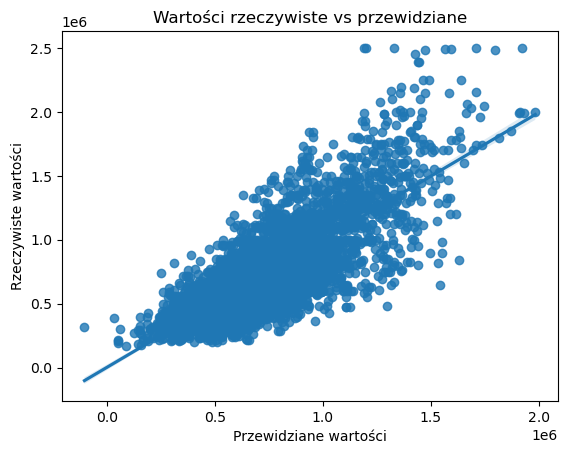

In [382]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel('Przewidziane wartości')
plt.ylabel('Rzeczywiste wartości')
plt.title('Wartości rzeczywiste vs przewidziane')
plt.show()

In [389]:
x_train , x_test , y_train , y_test = train_test_split(data_replaced_labeled.drop('price', axis=1), 
                                                       data_replaced_labeled['price'], 
                                                       test_size = 0.10,random_state = 29)
reg.fit(x_train, y_train)
reg.score(x_train, y_train)

0.6040711105089784

In [458]:
data_replaced_onehot.columns = data_replaced_onehot.columns.astype(str)
x_train , x_test , y_train , y_test = train_test_split(data_replaced_onehot.drop('price', axis=1), 
                                                       data_replaced_onehot['price'], 
                                                       test_size = 0.10,random_state = 29)
reg.fit(x_train, y_train)
reg.score(x_train, y_train)

0.7555898977136916

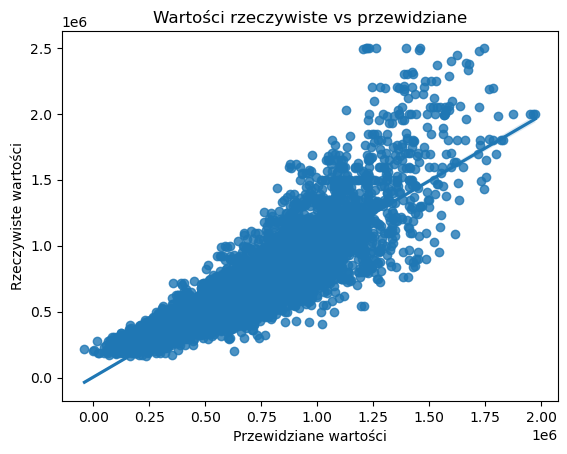

In [459]:
y_pred = reg.predict(x_test)
sns.regplot(x=y_pred, y=y_test)
plt.xlabel('Przewidziane wartości')
plt.ylabel('Rzeczywiste wartości')
plt.title('Wartości rzeczywiste vs przewidziane')
plt.show()

In [456]:
data_deleted_onehot.columns = data_deleted_onehot.columns.astype(str)
x_train , x_test , y_train , y_test = train_test_split(data_deleted_onehot.drop('price', axis=1), 
                                                       data_deleted_onehot['price'], 
                                                       test_size = 0.10,random_state = 29)
reg.fit(x_train, y_train)
reg.score(x_train, y_train)

0.7470282162223789

In [460]:
x_train , x_test , y_train , y_test = train_test_split(data_replaced_onehot.drop('price', axis=1), 
                                                       data_replaced_onehot['price'], 
                                                       test_size = 0.10,random_state = 29)

In [461]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)

In [462]:
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 107142781814.7420            1.85m
         2 93337294476.5867            1.91m
         3 81750571420.4122            1.90m
         4 72148599708.9937            1.90m
         5 64237252949.3434            1.84m
         6 57608402844.0834            1.83m
         7 52196594904.2795            1.80m
         8 47564095022.0413            1.78m
         9 43643074944.8264            1.77m
        10 40354230443.1472            1.75m
        20 23955394101.4631            1.63m
        30 19089274326.7867            1.53m
        40 16846981828.0225            1.43m
        50 15722070982.0239            1.34m
        60 14893434415.1648            1.25m
        70 14332835241.7498            1.16m
        80 13837251911.5424            1.07m
        90 13341690887.4141           58.47s
       100 12890633616.6828           53.07s
       200 10592779086.6510            0.00s


GradientBoostingRegressor(max_depth=5, n_estimators=200, verbose=1)

In [464]:
gbr.score(x_test, y_test)

0.9015484197040572

In [466]:
y_pred = gbr.predict(x_test)

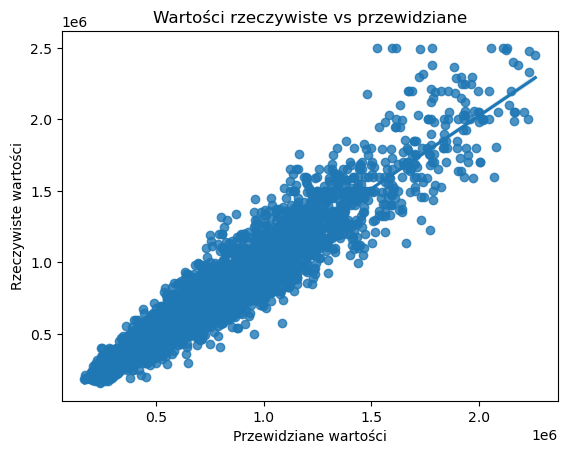

In [467]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel('Przewidziane wartości')
plt.ylabel('Rzeczywiste wartości')
plt.title('Wartości rzeczywiste vs przewidziane')
plt.show()

In [484]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 300, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 107142781814.7421            2.63m
         2 93337294476.5868            2.72m
         3 81750571420.4124            2.86m
         4 72148599708.9939            2.81m
         5 64237252949.3436            2.77m
         6 57608402844.0836            2.84m
         7 52196594904.2796            2.82m
         8 47564095022.0414            2.79m
         9 43643074944.8265            2.75m
        10 40354230443.1473            2.74m
        20 23955394101.4631            2.59m
        30 19089274326.7867            2.50m
        40 16846981828.0225            2.40m
        50 15722070982.0239            2.30m
        60 14893434415.1647            2.20m
        70 14332835241.7498            2.10m
        80 13837251911.5423            2.00m
        90 13341690887.4141            1.90m
       100 12890633616.6827            1.81m
       200 10592779086.6510           53.75s
       300  9041112326.4165            0.00s


GradientBoostingRegressor(max_depth=5, n_estimators=300, verbose=1)

In [485]:
gbr.score(x_test, y_test)

0.9117666557346096

In [486]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 107142781814.7421            3.49m
         2 93337294476.5868            3.87m
         3 81750571420.4122            4.00m
         4 72148599708.9937            3.91m
         5 64237252949.3435            3.81m
         6 57608402844.0834            3.78m
         7 52196594904.2795            3.72m
         8 47564095022.0413            3.70m
         9 43643074944.8264            3.76m
        10 40354230443.1472            3.74m
        20 23955394101.4630            4.27m
        30 19089274326.7867            3.94m
        40 16846981828.0225            3.71m
        50 15722070982.0239            3.52m
        60 14893434415.1648            3.36m
        70 14332835241.7498            3.21m
        80 13837251911.5424            3.07m
        90 13341690887.4141            2.95m
       100 12890633616.6828            2.83m
       200 10592779086.6510            1.83m
       300  9041112326.4165           54.59s
       4

GradientBoostingRegressor(max_depth=5, n_estimators=400, verbose=1)

In [487]:
gbr.score(x_test, y_test)

0.9188979648374778

In [488]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 107142781814.7421            4.68m
         2 93337294476.5868            4.59m
         3 81750571420.4123            4.61m
         4 72148599708.9938            4.56m
         5 64237252949.3436            4.55m
         6 57608402844.0835            4.53m
         7 52196594904.2796            4.54m
         8 47564095022.0414            4.51m
         9 43643074944.8264            4.51m
        10 40354230443.1473            4.47m
        20 23955394101.4631            4.39m
        30 19089274326.7867            4.43m
        40 16846981828.0225            4.32m
        50 15722070982.0239            4.19m
        60 14893434415.1648            4.08m
        70 14332835241.7498            3.95m
        80 13837251911.5424            3.87m
        90 13341690887.4141            3.95m
       100 12890633616.6828            4.03m
       200 10592779086.6510            2.91m
       300  9041112326.4165            1.87m
       4

GradientBoostingRegressor(max_depth=5, n_estimators=500, verbose=1)

In [489]:
gbr.score(x_test, y_test)

0.9243770276596536

In [490]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 600, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 107142781814.7421            5.83m
         2 93337294476.5868            5.72m
         3 81750571420.4122            5.96m
         4 72148599708.9937            5.92m
         5 64237252949.3436            5.83m
         6 57608402844.0835            5.73m
         7 52196594904.2796            5.74m
         8 47564095022.0414            5.74m
         9 43643074944.8264            5.70m
        10 40354230443.1473            5.64m
        20 23955394101.4631            5.46m
        30 19089274326.7867            5.43m
        40 16846981828.0225            5.28m
        50 15722070982.0239            5.17m
        60 14893434415.1648            5.08m
        70 14332835241.7498            4.97m
        80 13837251911.5424            4.84m
        90 13341690887.4141            4.74m
       100 12890633616.6827            4.67m
       200 10592779086.6510            3.64m
       300  9041112326.4165            2.66m
       4

GradientBoostingRegressor(max_depth=5, n_estimators=600, verbose=1)

In [491]:
gbr.score(x_test, y_test)

0.9291525463699922

In [492]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 10, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 102827712277.2573            4.05m
         2 85483319237.6470            4.11m
         3 71302943569.3873            4.08m
         4 59702969644.6495            4.08m
         5 50249854187.5553            4.01m
         6 42437642292.2074            3.98m
         7 35981582742.4124            3.97m
         8 30682104550.9356            3.92m
         9 26331033649.3255            3.89m
        10 22746773357.5895            3.86m
        20  7703706691.3844            3.64m
        30  4596325486.8099            3.45m
        40  3547500873.0547            3.28m
        50  2977062043.8858            3.08m
        60  2669623726.1914            2.88m
        70  2427606084.8183            2.66m
        80  2220333487.7273            2.44m
        90  2071392720.4255            2.23m
       100  1955822355.7424            2.00m
       200  1188207345.6931            0.00s


GradientBoostingRegressor(max_depth=10, n_estimators=200, verbose=1)

In [493]:
gbr.score(x_test, y_test)

0.9639867519922809

In [494]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 15, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 100996326939.9895            6.61m
         2 82273939492.5430            6.48m
         3 67054609029.2180            6.50m
         4 54701870094.8322            6.50m
         5 44660337078.7981            6.46m
         6 36479797067.1581            6.43m
         7 29837293654.4646            6.38m
         8 24429006236.2447            6.42m
         9 20021016112.1929            6.42m
        10 16430870990.5001            6.42m
        20  2526689993.8072            6.11m
        30   555610701.2313            5.84m
        40   197333513.4604            5.45m
        50   101051363.8560            5.07m
        60    61898379.2724            4.73m
        70    42499483.6307            4.36m
        80    32888953.0705            3.98m
        90    26395190.1988            3.65m
       100    21551392.2936            3.28m
       200     5263174.7556            0.00s


GradientBoostingRegressor(max_depth=15, n_estimators=200, verbose=1)

In [495]:
gbr.score(x_test, y_test)

0.9676332056656941

In [496]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 20, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 100547531802.5956            8.79m
         2 81514228405.0372            8.58m
         3 66091068221.3315            8.68m
         4 53589010500.0955            8.58m
         5 43454407418.0126            8.53m
         6 35241246975.3155            8.44m
         7 28584037536.5300            8.41m
         8 23189526254.4148            8.41m
         9 18809500401.3357            8.37m
        10 15260363991.2923            8.33m
        20  1912090116.8945            7.94m
        30   253100979.5528            7.45m
        40    38841312.6499            7.02m
        50     9056545.6760            6.57m
        60     3698643.3817            6.15m
        70     2201631.6732            5.73m
        80     1813186.3720            5.30m
        90     1689705.2080            4.87m
       100     1613704.7407            4.42m
       200     1572217.4990            0.00s


GradientBoostingRegressor(max_depth=20, n_estimators=200, verbose=1)

In [497]:
gbr.score(x_test, y_test)

0.9580243135568205

In [468]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 10, min_samples_split = 2,
          learning_rate = 0.1, loss = 'huber', verbose = 1)

In [469]:
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 46909083660.9962           10.70m
         2 38659884620.4495           10.77m
         3 32102877593.0634           10.75m
         4 26799529249.0142           10.65m
         5 22520107986.7619           10.63m
         6 18966589804.9079           10.63m
         7 16098249860.1179           10.53m
         8 13741362509.3877           10.60m
         9 11835841049.1789           10.54m
        10 10270081733.7011           10.51m
        20  3728637316.5270           10.15m
        30  2308546635.3568            9.76m
        40  1782173908.2582            9.41m
        50  1524221629.2900            9.05m
        60  1373244142.1821            8.62m
        70  1272414271.8640            8.20m
        80  1184451198.1818            7.78m
        90  1105332952.6493            7.41m
       100  1044041095.2989            7.03m
       200   623295774.1742            4.28m
       300   391079119.5918            2.10m
       40

GradientBoostingRegressor(loss='huber', max_depth=10, n_estimators=400,
                          verbose=1)

In [470]:
gbr.score(x_test, y_test)

0.9638901414696378

In [474]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 10, min_samples_split = 3,
          learning_rate = 0.1, loss = 'huber', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 46909086424.3790           13.14m
         2 38659920767.5446           13.00m
         3 32102978647.7175           12.84m
         4 26800160340.1978           12.86m
         5 22520672211.1040           12.77m
         6 18965978849.7777           12.73m
         7 16097091629.3449           12.74m
         8 13740021754.5667           12.68m
         9 11820187572.5407           12.68m
        10 10250558511.5877           12.65m
        20  3766570636.4754           12.35m
        30  2370564206.8741           12.05m
        40  1817876941.8103           11.97m
        50  1511523535.3770           11.79m
        60  1336088637.5148           11.35m
        70  1226237180.6043           10.85m
        80  1138232374.7295           10.43m
        90  1067820346.3707           10.04m
       100  1010149728.3068           10.06m
       200   631848867.9793            6.84m
       300   411806994.1131            4.40m
       40

GradientBoostingRegressor(loss='huber', max_depth=10, min_samples_split=3,
                          n_estimators=500, verbose=1)

In [475]:
gbr.score(x_test, y_test)

0.9646452663740732

In [476]:
y_pred = gbr.predict(x_test)

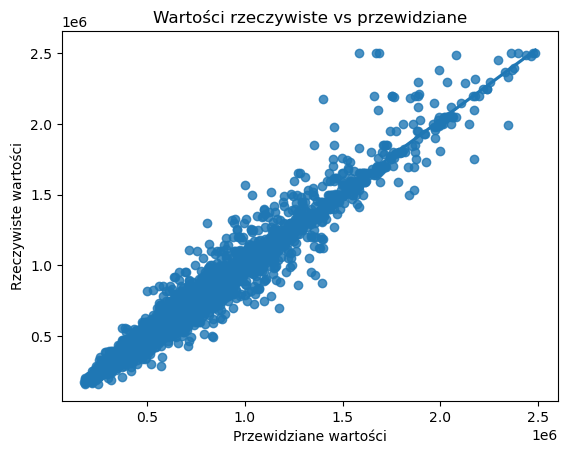

In [477]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel('Przewidziane wartości')
plt.ylabel('Rzeczywiste wartości')
plt.title('Wartości rzeczywiste vs przewidziane')
plt.show()

In [479]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 10, min_samples_split = 2,
          learning_rate = 0.2, loss = 'absolute_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1      212303.7419           10.38m
         2      178531.2833            9.78m
         3      152243.4106            9.67m
         4      132023.3300            9.58m
         5      116300.4633            9.56m
         6      105244.3122            9.61m
         7       96371.8102            9.64m
         8       88380.5679            9.60m
         9       82720.4377            9.58m
        10       77899.0008            9.58m
        20       60026.2749            9.14m
        30       54863.5956            8.59m
        40       52018.7155            8.07m
        50       50128.9869            7.69m
        60       49181.9636            7.39m
        70       47771.5699            7.06m
        80       46745.4189            6.80m
        90       45700.8491            6.50m
       100       45299.5557            6.20m
       200       39781.5441            3.87m
       300       37889.2947            1.86m
       40

GradientBoostingRegressor(learning_rate=0.2, loss='absolute_error',
                          max_depth=10, n_estimators=400, verbose=1)

In [480]:
gbr.score(x_test, y_test)

0.9323006555977722

In [481]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 10, min_samples_split = 2,
          learning_rate = 0.2, loss = 'huber', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 39328418110.8965           11.04m
         2 26727559607.7061           10.72m
         3 18611333064.9057           10.83m
         4 13364523498.9171           10.71m
         5  9876621176.4500           10.79m
         6  7608823271.4680           10.65m
         7  6072133023.3953           10.53m
         8  5000268186.8779           10.47m
         9  4243144424.1733           10.42m
        10  3700164145.6683           10.36m
        20  1877301867.4189           10.05m
        30  1441220073.4261            9.48m
        40  1215535629.1205            9.16m
        50  1076020382.5507            8.58m
        60   955385134.3278            8.06m
        70   839672318.4469            7.67m
        80   776249670.2388            7.27m
        90   696720874.6300            6.95m
       100   621979887.2608            6.70m
       200   252313279.1270            4.29m
       300   129492400.4890            2.15m
       40

GradientBoostingRegressor(learning_rate=0.2, loss='huber', max_depth=10,
                          n_estimators=400, verbose=1)

In [482]:
gbr.score(x_test, y_test)

0.9667685221949145

In [498]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5, min_samples_split = 4,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 107142781814.7421            1.71m
         2 93337294476.5868            1.83m
         3 81750571420.4122            1.96m
         4 72148599708.9937            1.93m
         5 64237252949.3435            1.91m
         6 57608402844.0834            1.91m
         7 52196594904.2795            1.87m
         8 47564095022.0413            1.86m
         9 43643074944.8264            1.83m
        10 40354230443.1472            1.81m
        20 23955394101.4630            1.67m
        30 19089274326.7867            1.55m
        40 16846981832.9470            1.45m
        50 15722070998.6028            1.36m
        60 14893446545.7783            1.26m
        70 14332861851.6776            1.17m
        80 13837281738.1476            1.08m
        90 13341710139.0054           59.61s
       100 12890895419.3780           53.96s
       200 10591033899.9529            0.00s


GradientBoostingRegressor(max_depth=5, min_samples_split=4, n_estimators=200,
                          verbose=1)

In [499]:
gbr.score(x_train, y_train)

0.9146122868195299

In [500]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5, min_samples_split = 6,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 107142781814.7420            1.83m
         2 93337294476.5868            1.79m
         3 81750571420.4123            1.87m
         4 72148599708.9938            1.86m
         5 64237252949.3435            1.90m
         6 57608402844.0835            1.88m
         7 52196594904.2796            1.88m
         8 47564095022.0414            1.86m
         9 43643074944.8263            1.84m
        10 40354230443.1472            1.82m
        20 23955394101.4630            1.75m
        30 19089369559.7779            1.61m
        40 16847906091.6052            1.49m
        50 15724693502.1095            1.39m
        60 14896039248.0033            1.29m
        70 14335393288.7738            1.20m
        80 13840154667.0865            1.10m
        90 13346353257.7387            1.01m
       100 12902588059.4805           54.91s
       200 10559370207.5381            0.00s


GradientBoostingRegressor(max_depth=5, min_samples_split=6, n_estimators=200,
                          verbose=1)

In [501]:
gbr.score(x_train, y_train)

0.9148675678725119

In [502]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5, min_samples_split = 8,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 107142781814.7421            1.99m
         2 93337294476.5868            1.97m
         3 81750571420.4124            1.96m
         4 72148599708.9938            1.89m
         5 64237252949.3436            1.88m
         6 57608402844.0836            1.84m
         7 52196594904.2796            1.87m
         8 47564095022.0414            1.84m
         9 43643074944.8264            1.83m
        10 40354230443.1473            1.80m
        20 23955394101.4631            1.75m
        30 19089369559.7779            1.66m
        40 16847906091.6052            1.53m
        50 15724693502.1095            1.42m
        60 14896165623.4400            1.31m
        70 14335973705.8546            1.22m
        80 13840639608.7748            1.12m
        90 13347360139.6817            1.04m
       100 12930761908.7945           56.50s
       200 10409439125.0470            0.00s


GradientBoostingRegressor(max_depth=5, min_samples_split=8, n_estimators=200,
                          verbose=1)

In [503]:
gbr.score(x_train, y_train)

0.9160763518674946

In [504]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5, min_samples_split = 8,
          learning_rate = 0.2, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 92029017787.4432            1.86m
         2 70647755468.8534            1.87m
         3 55868278723.9816            1.93m
         4 45982601649.5479            1.86m
         5 38530841466.5579            1.86m
         6 33653108321.5982            1.81m
         7 29853155709.9684            1.79m
         8 27306402304.0453            1.77m
         9 25334156953.4514            1.75m
        10 23882399467.6204            1.73m
        20 17524703822.5015            1.62m
        30 15476461246.1172            1.54m
        40 14362042204.1732            1.46m
        50 13315925012.0279            1.36m
        60 12771808105.7706            1.27m
        70 12162453927.4502            1.18m
        80 11809789165.1686            1.08m
        90 11370323844.8875           58.69s
       100 10936668451.3891           53.11s
       200  8099228578.7965            0.00s


GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_split=8,
                          n_estimators=200, verbose=1)

In [505]:
gbr.score(x_test, y_test)

0.9169190801709567

In [506]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5, min_samples_split = 8,
          learning_rate = 0.05, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 115366447535.4782            1.74m
         2 107546435376.3534            1.82m
         3 100453791095.8607            1.79m
         4 93960398114.3447            1.77m
         5 87969784447.2840            1.82m
         6 82505133976.4028            1.82m
         7 77569187602.2724            1.82m
         8 73076473242.6955            1.81m
         9 68921718111.4392            1.82m
        10 65128417693.8712            1.80m
        20 41011661800.5816            1.72m
        30 30068980997.3564            1.64m
        40 24282572925.3948            1.53m
        50 21158066253.8506            1.42m
        60 19156336594.2885            1.31m
        70 17760085647.1870            1.21m
        80 16844721878.7767            1.12m
        90 16219995280.7732            1.02m
       100 15738500317.0375           55.59s
       200 12982052903.7655            0.00s


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_split=8,
                          n_estimators=200, verbose=1)

In [507]:
gbr.score(x_test, y_test)

0.8854011094114969

In [508]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5, min_samples_split = 8,
          learning_rate = 0.3, loss = 'squared_error', verbose = 1)
gbr.fit(x_train, y_train)
gbr.score(x_test, y_test)

      Iter       Train Loss   Remaining Time 
         1 78693343645.7088            1.81m
         2 54355721723.2873            1.85m
         3 40910642400.8655            1.94m
         4 33525197055.7213            1.88m
         5 28086343132.5323            1.91m
         6 24987816158.1489            1.87m
         7 22493740562.0607            1.84m
         8 21117713806.3283            1.81m
         9 20146408956.0524            1.80m
        10 18828394983.0590            1.77m
        20 15300846651.2066            1.66m
        30 13826235722.5453            1.55m
        40 12834169694.0297            1.45m
        50 12046372902.2804            1.34m
        60 11429227580.0616            1.24m
        70 10878599617.9652            1.15m
        80 10276040633.9884            1.06m
        90  9710676361.1418           58.28s
       100  9406981954.0372           52.79s
       200  6597480200.9808            0.00s


0.9264044835805282

In [514]:
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 10, min_samples_split = 4,
          learning_rate = 0.1, loss = 'huber', verbose = 1)
gbr.fit(x_train, y_train)
gbr.score(x_test, y_test)

      Iter       Train Loss   Remaining Time 
         1 46909339895.8333           11.07m
         2 38660129030.6747           10.56m
         3 32103290280.2349           10.48m
         4 26802901131.4882           10.43m
         5 22520748655.1140           10.35m
         6 18965444782.1102           10.27m
         7 16094692307.7709           10.25m
         8 13742623195.3942           10.22m
         9 11828132539.4842           10.20m
        10 10260015023.5590           10.15m
        20  3749544917.1157            9.72m
        30  2355399141.1779            9.48m
        40  1812894605.9603            9.13m
        50  1541379878.9743            8.78m
        60  1387489146.0352            8.36m
        70  1286748449.3720            7.96m
        80  1192066681.1169            7.57m
        90  1129869986.3947            7.19m
       100  1070166636.9879            6.85m
       200   652127054.7718            4.25m
       300   414899444.3496            2.09m
       40

0.9637082164363006

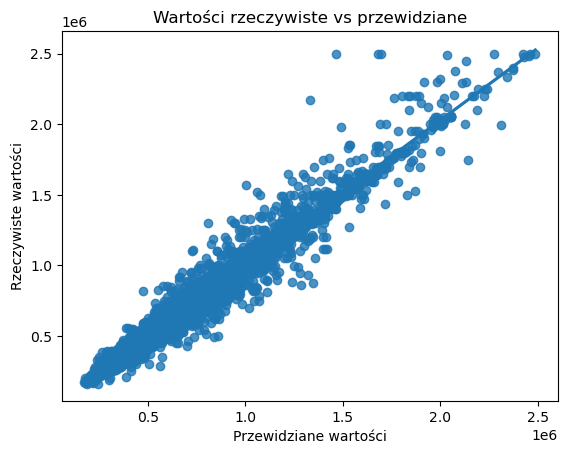

In [515]:
y_pred = gbr.predict(x_test)
sns.regplot(x=y_pred, y=y_test)
plt.xlabel('Przewidziane wartości')
plt.ylabel('Rzeczywiste wartości')
plt.title('Wartości rzeczywiste vs przewidziane')
plt.show()

In [520]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print(f"Średni błąd bezwzględny: {mae}")

Średni błąd bezwzględny: 36685.09280430686


In [54]:
hst = ensemble.HistGradientBoostingRegressor(max_depth = 10,
          learning_rate = 0.1, loss = 'squared_error', verbose = 1)

In [55]:
hst.fit(x_train, y_train)

Binning 0.008 GB of training data: 0.097 s
Binning 0.001 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 7, train loss: 56261990714.58950, val loss: 53196770101.68197, in 0.020s
[2/100] 1 tree, 31 leaves, max depth = 6, train loss: 48897485606.50730, val loss: 46183470454.48145, in 0.014s
[3/100] 1 tree, 31 leaves, max depth = 8, train loss: 42678399318.11971, val loss: 40281563435.25037, in 0.013s
[4/100] 1 tree, 31 leaves, max depth = 7, train loss: 37616208389.33759, val loss: 35472891607.43161, in 0.012s
[5/100] 1 tree, 31 leaves, max depth = 7, train loss: 33388744005.73512, val loss: 31441965285.30812, in 0.013s
[6/100] 1 tree, 31 leaves, max depth = 7, train loss: 29809664283.18703, val loss: 28081644298.69348, in 0.013s
[7/100] 1 tree, 31 leaves, max depth = 9, train loss: 26875830380.34842, val loss: 25283111174.27414, in 0.013s
[8/100] 1 tree, 31 leaves, max depth = 8, train loss: 24311746829.46387, val loss: 22920341714.

[73/100] 1 tree, 31 leaves, max depth = 10, train loss: 5883959484.47281, val loss: 5922106070.87739, in 0.014s
[74/100] 1 tree, 31 leaves, max depth = 10, train loss: 5844460887.94308, val loss: 5895003335.07013, in 0.012s
[75/100] 1 tree, 31 leaves, max depth = 10, train loss: 5814528591.32754, val loss: 5878917156.37125, in 0.016s
[76/100] 1 tree, 31 leaves, max depth = 7, train loss: 5784975658.82845, val loss: 5844051359.03982, in 0.013s
[77/100] 1 tree, 31 leaves, max depth = 10, train loss: 5758380188.72151, val loss: 5822908351.55272, in 0.012s
[78/100] 1 tree, 31 leaves, max depth = 10, train loss: 5731556186.73752, val loss: 5808854274.30546, in 0.011s
[79/100] 1 tree, 31 leaves, max depth = 10, train loss: 5698508654.72096, val loss: 5781499234.96463, in 0.015s
[80/100] 1 tree, 31 leaves, max depth = 10, train loss: 5675716816.76137, val loss: 5775222909.58825, in 0.011s
[81/100] 1 tree, 31 leaves, max depth = 10, train loss: 5648813687.53529, val loss: 5750580036.55022, in 

HistGradientBoostingRegressor(max_depth=10, verbose=1)

In [56]:
hst.score(x_test, y_test)

0.9081219808309929

In [59]:
hst = ensemble.HistGradientBoostingRegressor(max_depth = 10,
          learning_rate = 0.1, loss = 'absolute_error', verbose = 1)

In [60]:
hst.fit(x_train, y_train)

Binning 0.008 GB of training data: 0.085 s
Binning 0.001 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 7, train loss: 241622.82968, val loss: 246260.85022, in 0.020s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 225972.35969, val loss: 230560.24196, in 0.018s
[3/100] 1 tree, 31 leaves, max depth = 8, train loss: 212018.13525, val loss: 216769.26932, in 0.016s
[4/100] 1 tree, 31 leaves, max depth = 6, train loss: 200520.79227, val loss: 205438.96496, in 0.016s
[5/100] 1 tree, 31 leaves, max depth = 7, train loss: 189044.22342, val loss: 193896.30220, in 0.017s
[6/100] 1 tree, 31 leaves, max depth = 8, train loss: 180323.01607, val loss: 184992.29097, in 0.016s
[7/100] 1 tree, 31 leaves, max depth = 7, train loss: 171488.39066, val loss: 176017.30019, in 0.017s
[8/100] 1 tree, 31 leaves, max depth = 9, train loss: 163870.75900, val loss: 168261.98667, in 0.017s
[9/100] 1 tree, 31 leaves, max depth = 8, train loss: 156104.68

HistGradientBoostingRegressor(loss='absolute_error', max_depth=10, verbose=1)

In [61]:
hst.score(x_test, y_test)

0.8847319049113856

In [64]:
hst = ensemble.HistGradientBoostingRegressor(max_depth = 10,
          learning_rate = 0.1, loss = 'gamma', verbose = 1)

In [65]:
hst.fit(x_train, y_train)

Binning 0.008 GB of training data: 0.086 s
Binning 0.001 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 7, train loss: 14.52079, val loss: 14.52470, in 0.017s
[2/100] 1 tree, 31 leaves, max depth = 7, train loss: 14.50852, val loss: 14.51235, in 0.015s
[3/100] 1 tree, 31 leaves, max depth = 7, train loss: 14.49860, val loss: 14.50243, in 0.014s
[4/100] 1 tree, 31 leaves, max depth = 8, train loss: 14.49040, val loss: 14.49416, in 0.016s
[5/100] 1 tree, 31 leaves, max depth = 7, train loss: 14.48375, val loss: 14.48739, in 0.015s
[6/100] 1 tree, 31 leaves, max depth = 8, train loss: 14.47829, val loss: 14.48189, in 0.015s
[7/100] 1 tree, 31 leaves, max depth = 7, train loss: 14.47384, val loss: 14.47740, in 0.015s
[8/100] 1 tree, 31 leaves, max depth = 8, train loss: 14.47002, val loss: 14.47359, in 0.015s
[9/100] 1 tree, 31 leaves, max depth = 8, train loss: 14.46675, val loss: 14.47030, in 0.016s
[10/100] 1 tree, 31 leaves, max d

[86/100] 1 tree, 31 leaves, max depth = 10, train loss: 14.44212, val loss: 14.44578, in 0.015s
[87/100] 1 tree, 31 leaves, max depth = 10, train loss: 14.44209, val loss: 14.44576, in 0.014s
[88/100] 1 tree, 31 leaves, max depth = 10, train loss: 14.44206, val loss: 14.44573, in 0.013s
[89/100] 1 tree, 31 leaves, max depth = 10, train loss: 14.44203, val loss: 14.44571, in 0.015s
[90/100] 1 tree, 31 leaves, max depth = 10, train loss: 14.44199, val loss: 14.44567, in 0.015s
[91/100] 1 tree, 31 leaves, max depth = 9, train loss: 14.44196, val loss: 14.44564, in 0.013s
[92/100] 1 tree, 31 leaves, max depth = 10, train loss: 14.44193, val loss: 14.44562, in 0.013s
[93/100] 1 tree, 31 leaves, max depth = 7, train loss: 14.44189, val loss: 14.44558, in 0.012s
[94/100] 1 tree, 31 leaves, max depth = 8, train loss: 14.44187, val loss: 14.44555, in 0.014s
[95/100] 1 tree, 31 leaves, max depth = 10, train loss: 14.44184, val loss: 14.44552, in 0.021s
[96/100] 1 tree, 31 leaves, max depth = 10,

HistGradientBoostingRegressor(loss='gamma', max_depth=10, verbose=1)

In [66]:
hst.score(x_test, y_test)

0.9000586392089732

In [69]:
hst = ensemble.HistGradientBoostingRegressor(max_depth = 10,
          learning_rate = 0.1, loss = 'poisson', verbose = 1)

In [70]:
hst.fit(x_train, y_train)

Binning 0.008 GB of training data: 0.096 s
Binning 0.001 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 7, train loss: -9501410.35409, val loss: -9489095.45029, in 0.021s
[2/100] 1 tree, 31 leaves, max depth = 7, train loss: -9510620.70224, val loss: -9498699.18560, in 0.021s
[3/100] 1 tree, 31 leaves, max depth = 8, train loss: -9518077.47123, val loss: -9506336.38174, in 0.020s
[4/100] 1 tree, 31 leaves, max depth = 7, train loss: -9524143.79443, val loss: -9512532.93913, in 0.019s
[5/100] 1 tree, 31 leaves, max depth = 7, train loss: -9529109.82786, val loss: -9517679.92747, in 0.014s
[6/100] 1 tree, 31 leaves, max depth = 7, train loss: -9533245.48568, val loss: -9521919.36160, in 0.014s
[7/100] 1 tree, 31 leaves, max depth = 7, train loss: -9536761.90320, val loss: -9525549.13672, in 0.015s
[8/100] 1 tree, 31 leaves, max depth = 8, train loss: -9539655.16654, val loss: -9528523.09962, in 0.014s
[9/100] 1 tree, 31 leaves, max 

[77/100] 1 tree, 31 leaves, max depth = 9, train loss: -9560760.28452, val loss: -9549392.52245, in 0.024s
[78/100] 1 tree, 31 leaves, max depth = 10, train loss: -9560794.86518, val loss: -9549427.38073, in 0.018s
[79/100] 1 tree, 31 leaves, max depth = 10, train loss: -9560823.29348, val loss: -9549451.76328, in 0.019s
[80/100] 1 tree, 31 leaves, max depth = 10, train loss: -9560855.14606, val loss: -9549487.08217, in 0.023s
[81/100] 1 tree, 31 leaves, max depth = 10, train loss: -9560882.97702, val loss: -9549507.77836, in 0.016s
[82/100] 1 tree, 31 leaves, max depth = 10, train loss: -9560917.38020, val loss: -9549529.57449, in 0.014s
[83/100] 1 tree, 31 leaves, max depth = 10, train loss: -9560940.44230, val loss: -9549552.27936, in 0.012s
[84/100] 1 tree, 31 leaves, max depth = 10, train loss: -9560967.50591, val loss: -9549575.73633, in 0.012s
[85/100] 1 tree, 31 leaves, max depth = 10, train loss: -9560991.78470, val loss: -9549593.82672, in 0.013s
[86/100] 1 tree, 31 leaves, m

HistGradientBoostingRegressor(loss='poisson', max_depth=10, verbose=1)

In [71]:
hst.score(x_test, y_test)

0.9092541236079049